<a href="https://colab.research.google.com/github/gggegwa/gggegwa/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

Load the data file

In [93]:
telco_base_data = pd.read_csv('/content/World-happiness-report-2024.csv')

Show the top 5 records of data

In [94]:
telco_base_data.head(150)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


Get to know the attributes like shape, columns, datatypes

In [ ]:
telco_base_data.shape

(143, 12)

In [ ]:
telco_base_data.dtypes

,0
Country name,object
Regional indicator,object
Ladder score,float64
upperwhisker,float64
lowerwhisker,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64


In [43]:
telco_base_data.columns.values

array(['Country name', 'Regional indicator', 'Ladder score',
       'upperwhisker', 'lowerwhisker', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'], dtype=object)

In [96]:
Kenyan_data= telco_base_data[telco_base_data['Country name'] == 'United States of America']
Kenyan_corruption= Kenyan_data['Healthy life expectancy']
print(Kenyan_corruption)

22    0.542
Name: Healthy life expectancy, dtype: float64


In [46]:
!pip install geopandas==0.12.2
!pip install geoplot==0.4.4

In [ ]:
import geopandas as gpd
import geoplot as gplt

In [97]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [98]:
telco_base_data.rename(columns={'Country name': 'name'}, inplace=True)

In [99]:
merged_data = world.merge(telco_base_data, on='name')

<Axes: >

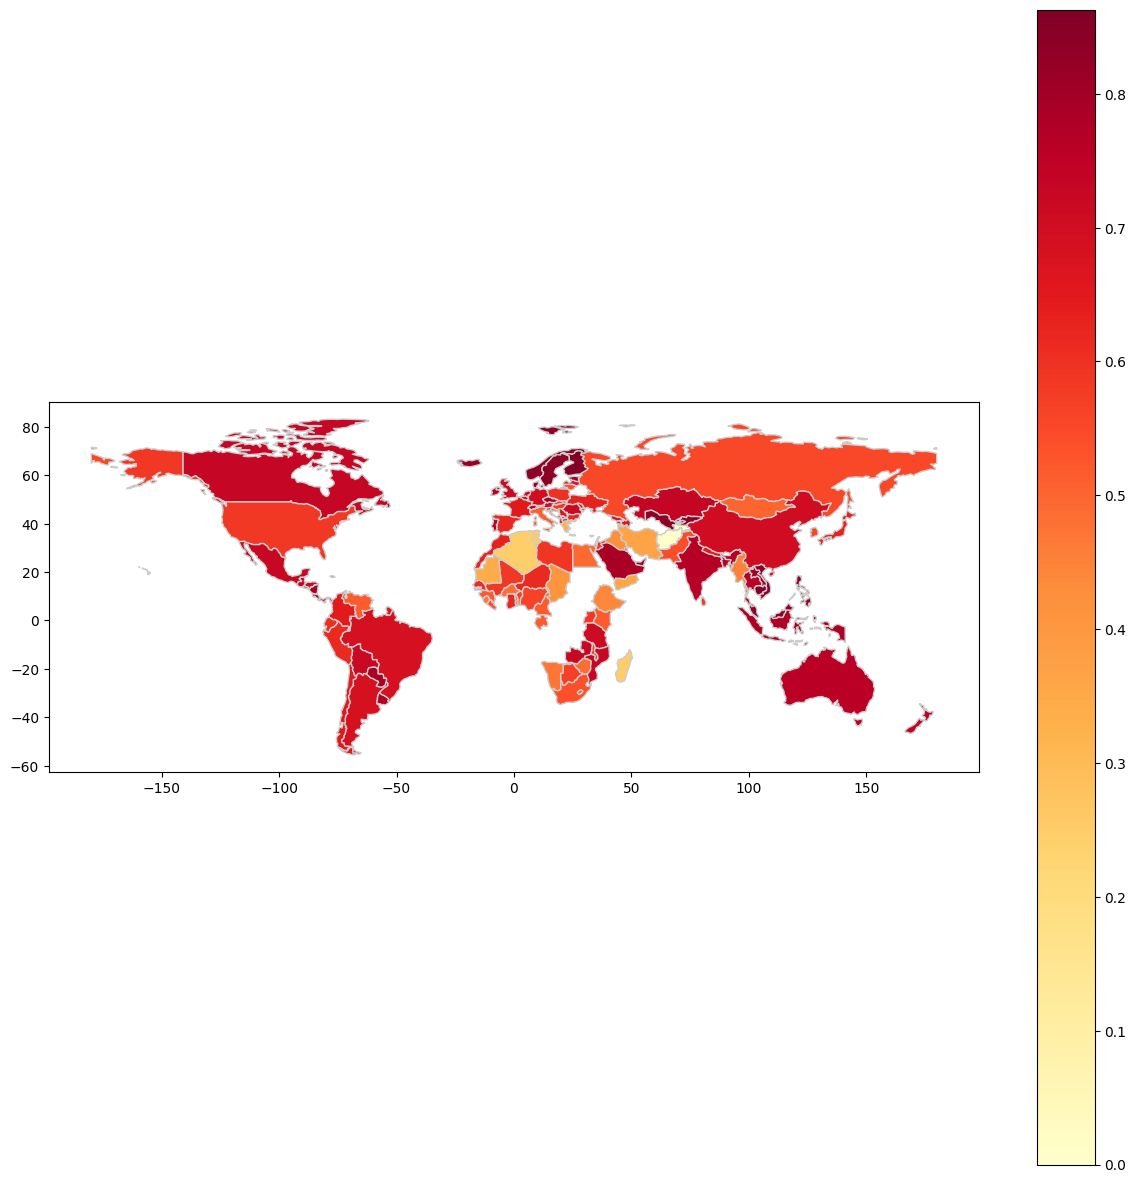

In [122]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
merged_data.plot(column='Freedom to make life choices', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='0.8', legend=True)



In [68]:
!pip install mpld3


Install 'Folium' package

In [125]:
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# Assuming merged_data is a GeoDataFrame
# Create a folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add the GeoDataFrame to the map
geojson = folium.GeoJson(
    merged_data,
    tooltip=GeoJsonTooltip(
        fields=['name', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Healthy life expectancy'],

        localize=True
    )
).add_to(m)

# Save the map as an HTML file
m.save('interactive_map_with_hover.html')
display(m)